In [9]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

In [10]:
author_marker_dict = {
    'Nietzsche': 'o',
    'Kafka': 's',
    'Austen': '^',
    'Hesse': 'D'
}
author_color_dict = {
    'Nietzsche': (0.2, 0.4, 0.8),
    'Kafka': (0.1, 0.7, 0.3),
    'Austen': (0.9, 0.6, 0.1),
    'Hesse': (1.0, 0.0, 0.)
}

numerical_columns = [
    'node_count',
    'edge_count',
    #'betweenness_standard_deviation',
    'average_degree',
    #'median_degree',
    'diameter',
    'average_distance',
    'betweenness_average',
    'average_clustering',
    'powerlaw_alpha_value',
    'powerlaw_xmin_value'
]


In [11]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df["link_distance"] == 1]
df = df[df['fixed_token_count'] == 13062]
print(df)

        author         title language  token_list_length  node_count  \
68      Austen          Anna       de              13062        3089   
69      Austen     Mansfield       de              13062        3518   
70       Hesse   Steppenwolf       de              13062        4554   
71       Hesse    Siddhartha       en              13062        2298   
72       Hesse        Demian       de              13062        3685   
73   Nietzsche      Jenseits       de              13062        4195   
74       Hesse        Demian       en              13062        2818   
75   Nietzsche       Goetzen       de              13062        4076   
76       Kafka       Amerika       en              13062        2743   
77       Kafka       Schloss       en              13062        2354   
78      Austen      Verstand       en              13062        2380   
79       Hesse   Steppenwolf       en              13062        3549   
80   Nietzsche   Zarathustra       en              13062        

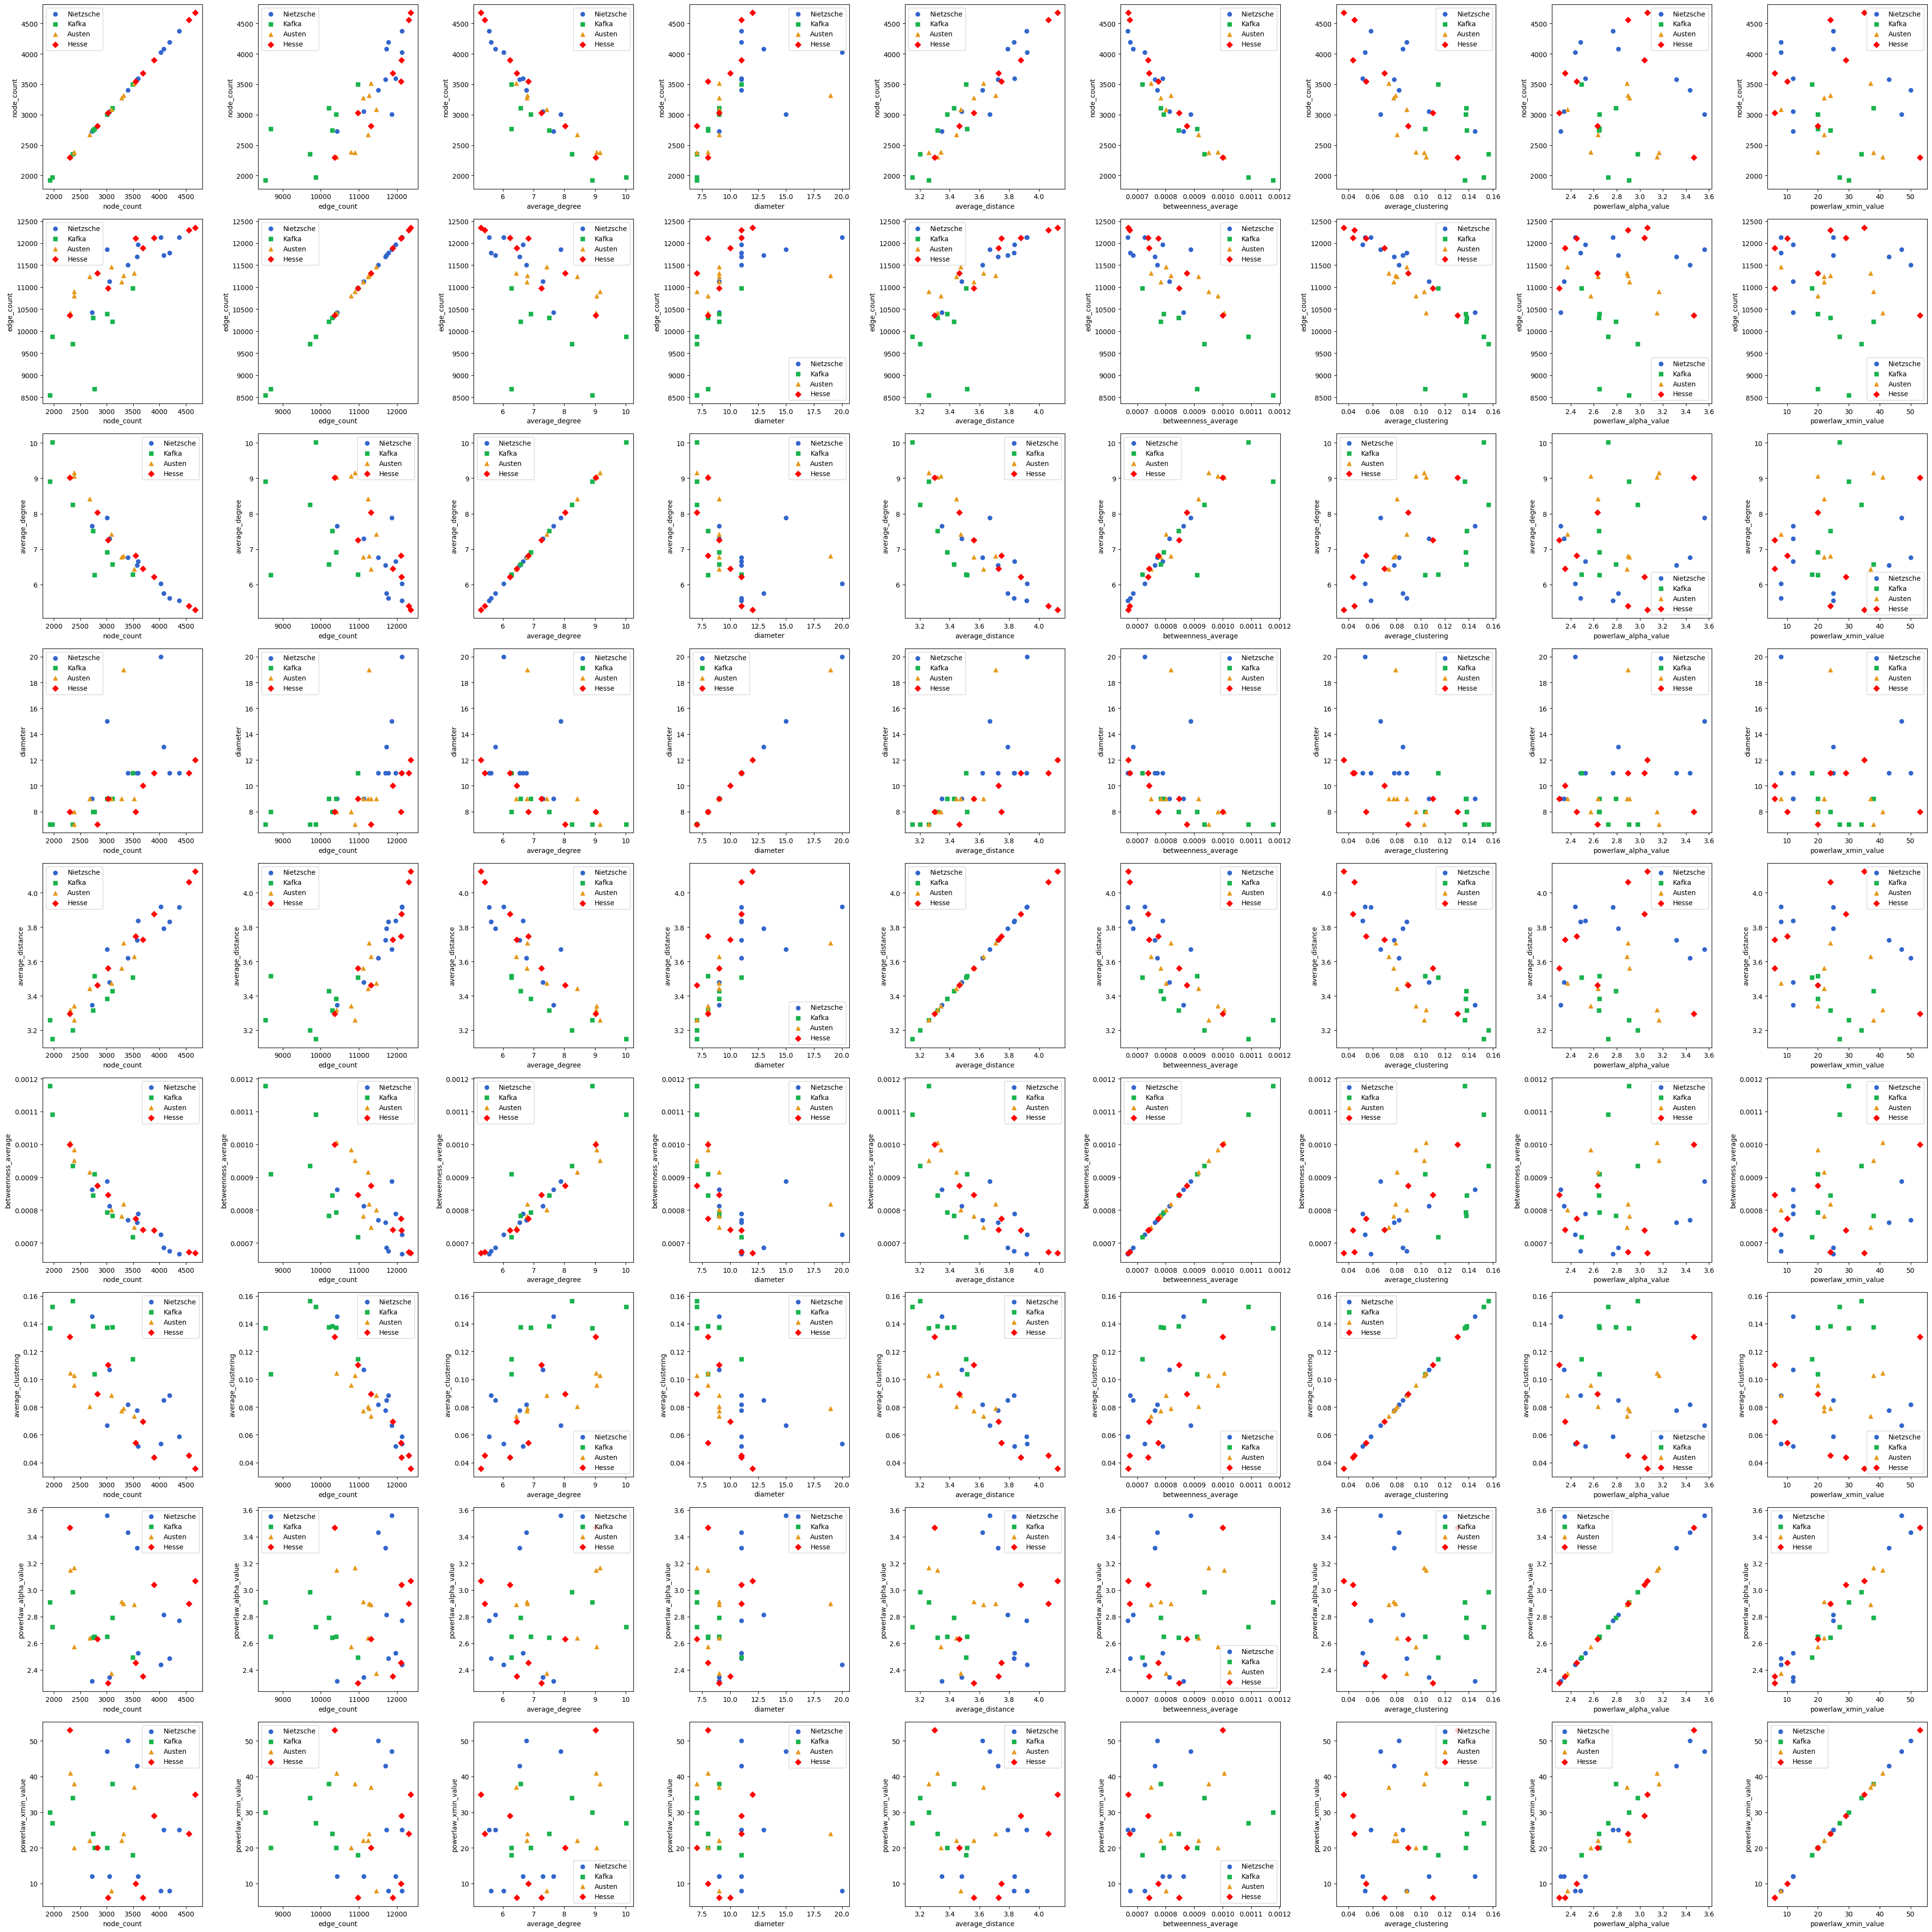

In [12]:
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(40, 40))


for i, column_i in enumerate(numerical_columns):
    for j, column_j in enumerate(numerical_columns):
        for author in author_marker_dict:
            # Unterschiedliche Farben für Englisch und Deutsch
            author_color = author_color_dict[author]
            author_color_en = author_color + (0.5,)  # heller (englisch)
            author_color_de = author_color + (1.0,)  # dunkler (deutsch)
            ax = axes[i, j]
            ax.set_xlabel(column_j)
            ax.set_ylabel(column_i)

            author_rows = df[df['author'] == author]

            author_rows_en = author_rows[author_rows['language'] == 'en']
            author_rows_de = author_rows[author_rows['language'] == 'de']

            # ax.scatter(author_rows_en[column_j], author_rows_en[column_i], marker=author_marker_dict[author], label = f'{author} (en)', color = author_color_en, s=50)

            # ax.scatter(author_rows_de[column_j], author_rows_de[column_i], marker=author_marker_dict[author], label = f'{author} (de)', color = author_color_de, s=200)
            # edgecolors='black' kann hinzugefügt werden



            ax.scatter(author_rows[column_j], author_rows[column_i], marker = author_marker_dict[author], label = f'{author}', color = author_color)

            ax.legend()
plt.tight_layout()
plt.savefig('scatter_matrix.png')
plt.show()

In [17]:
df = pd.read_csv('output_neu.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df["link_distance"] == 1]
df = df[df['fixed_token_count'] == 13062]
summary = df.groupby("author").agg({
    "powerlaw_alpha_value": ["min", "max", "mean"],
    "powerlaw_xmin_value": ["min", "max", "mean"]
})
print(summary)

          powerlaw_alpha_value                     powerlaw_xmin_value      \
                           min       max      mean                 min max   
author                                                                       
Austen                2.372169  3.166341  2.824243                   8  41   
Hesse                 2.299818  3.466838  2.775788                   6  53   
Kafka                 2.493885  2.982682  2.730058                  18  38   
Nietzsche             2.313079  3.558947  2.799641                   8  50   

                   
             mean  
author             
Austen     26.500  
Hesse      22.875  
Kafka      26.375  
Nietzsche  24.200  


          powerlaw_alpha_value                     powerlaw_xmin_value      \
                           min       max      mean                 min max   
author                                                                       
Austen                2.372169  3.166341  2.824243                   8  41   
Hesse                 2.299818  3.466838  2.775788                   6  53   
Kafka                 2.493885  2.982682  2.730058                  18  38   
Nietzsche             2.313079  3.558947  2.799641                   8  50   

                   
             mean  
author             
Austen     26.500  
Hesse      22.875  
Kafka      26.375  
Nietzsche  24.200  
